# Browser Activity Tracking – Demo Analysis

This notebook demonstrates how browsing history data is loaded, transformed, and analyzed. 
For privacy, this demo uses a **sample dataset** generated to mimic Chrome's `History` table structure (`urls`).

The goal: extract insight such as **top visited domains**, **time usage trend**, and **category segmentation**.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load already processed CSV (history.csv generated from ETL)
df = pd.read_csv("../scripts/data/updated_history.csv")
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'])

df.head()


,url,title,last_visit_time,category,hour,domain
0,https://www.booking.com/index.html?aid=1743217,Travel,2025-01-02 23:21:00,Learning,23,booking.com
1,https://travelsites.com/expedia/,Travel,2025-10-30 12:29:00,Learning,12,travelsites.com
2,https://travelsites.com/tripadvisor/,Travel,2025-07-12 05:55:00,Learning,5,travelsites.com
3,https://www.momondo.in/?ispredir=true,Travel,2025-03-06 18:26:00,Learning,18,momondo.in
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,Travel,2025-01-20 14:53:00,Learning,14,ebookers.com


## 1. Overview of Activity Dataset
Quick look at total number of visits, unique domains, and time range of activity.

In [4]:
print("Total records:", len(df))
print("Unique URLs:", df['url'].nunique())
print("Categories:", df['category'].unique())
print("Time range:", df['last_visit_time'].min(), "to", df['last_visit_time'].max())

Total records: 1408
Unique URLs: 1384
Categories: ['Learning' 'News']
Time range: 2025-01-01 00:22:00 to 2025-12-31 14:31:00


## 2. Top 10 Most Visited Domains
Extract domain from URL and count frequency.

In [10]:
# Extract domain
df['domain'] = df['url'].str.extract(r'https?://([^/]+)/')

top_domains = df['domain'].value_counts().head(10)
top_domains

domain
en.wikipedia.org      11
www.pagat.com          5
members.tripod.com     5
carehospitals.com      4
www.bbc.com            4
www.synapses.co.uk     3
www.dickestel.com      3
abcnews.go.com         2
secondlife.com         2
www.paltalk.com        2
Name: count, dtype: int64

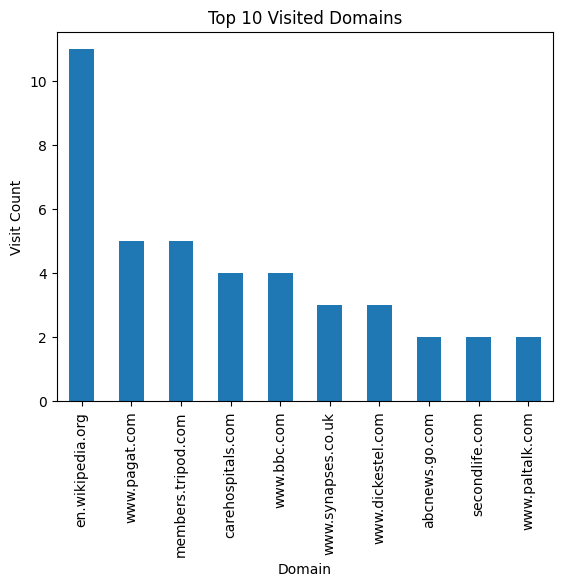

In [7]:
top_domains.plot(kind='bar')
plt.title("Top 10 Visited Domains")
plt.xlabel("Domain")
plt.ylabel("Visit Count")
plt.show()

## 3. Visits Over Time (Trend)
Check how browsing frequency changes over time.

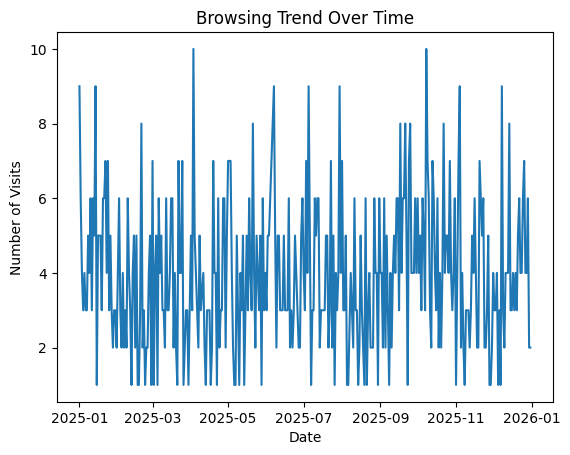

In [15]:
df['date'] = df['last_visit_time'].dt.date
daily_trend = df.groupby('date').size()

daily_trend.plot(kind='line')
plt.title("Browsing Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.show()

## 4. Category Breakdown
Visualizing how activity is distributed across categories assigned in ETL.

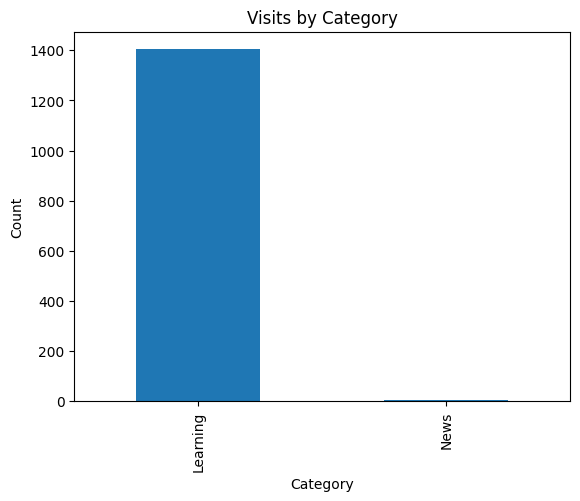

In [13]:
category_counts = df['category'].value_counts()
category_counts.plot(kind='bar')
plt.title("Visits by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## ✅ Summary & Next Steps

- **Top activity domains** reveal browsing focus.
- **Daily pattern** provides a timeline of behaviour.
- **Category segmentation** gives quick behavioural insight.

### Possible Enhancements:
- Integrate real Chrome history file with permission toggle.
- Deploy a **live dashboard using Power BI / Streamlit**.
- Automate daily run with scheduling.

> 📌 This analysis is demonstration-ready for portfolio and GitHub!